In [44]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib notebook')
import matplotlib.patches as mpatches

In [45]:
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_X

array([  3.3  ,   4.4  ,   5.5  ,   6.71 ,   6.93 ,   4.168,   9.779,
         6.182,   7.59 ,   2.167,   7.042,  10.791,   5.313,   7.997,
         5.654,   9.27 ,   3.1  ])

In [46]:
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
train_Y

array([ 1.7  ,  2.76 ,  2.09 ,  3.19 ,  1.694,  1.573,  3.366,  2.596,
        2.53 ,  1.221,  2.827,  3.465,  1.65 ,  2.904,  2.42 ,  2.94 ,  1.3  ])

In [47]:
n_samples = train_X.shape[0]
n_samples

17

In [48]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [49]:
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

In [50]:
W

<tf.Variable 'weight_2:0' shape=(1,) dtype=float32_ref>

In [51]:
#pred=XW+b
pred = tf.add(tf.multiply(X, W), b)
pred

<tf.Tensor 'Add_2:0' shape=<unknown> dtype=float32>

In [52]:
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
cost

<tf.Tensor 'truediv_2:0' shape=<unknown> dtype=float32>

In [53]:
learning_rate=0.5

In [54]:
optimizer=tf.train.AdadeltaOptimizer(learning_rate).minimize(cost)
optimizer

<tf.Operation 'Adadelta_2' type=NoOp>

In [55]:
init=tf.global_variables_initializer()

In [56]:
n_epochs=500
display_step=10
params=np.zeros((3,n_epochs))
params

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [57]:
feed={X:train_X,Y:train_Y}
feed

{<tf.Tensor 'Placeholder_4:0' shape=<unknown> dtype=float32>: array([  3.3  ,   4.4  ,   5.5  ,   6.71 ,   6.93 ,   4.168,   9.779,
          6.182,   7.59 ,   2.167,   7.042,  10.791,   5.313,   7.997,
          5.654,   9.27 ,   3.1  ]),
 <tf.Tensor 'Placeholder_5:0' shape=<unknown> dtype=float32>: array([ 1.7  ,  2.76 ,  2.09 ,  3.19 ,  1.694,  1.573,  3.366,  2.596,
         2.53 ,  1.221,  2.827,  3.465,  1.65 ,  2.904,  2.42 ,  2.94 ,  1.3  ])}

<IPython.core.display.Javascript object>


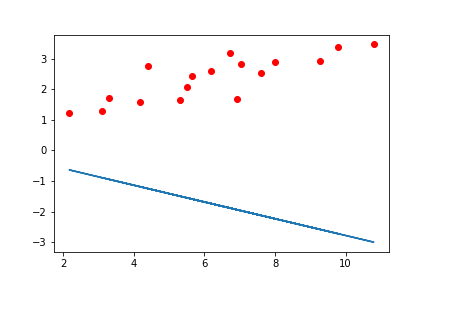

step 9 cost 14.160433769226074
step 19 cost 14.062744140625
step 29 cost 13.96535873413086
step 39 cost 13.86780071258545
step 49 cost 13.769983291625977
step 59 cost 13.671886444091797
step 69 cost 13.57351303100586
step 79 cost 13.474876403808594
step 89 cost 13.375988006591797
step 99 cost 13.27686595916748
step 109 cost 13.177531242370605
step 119 cost 13.077995300292969
step 129 cost 12.978275299072266
step 139 cost 12.878390312194824
step 149 cost 12.77835750579834
step 159 cost 12.678190231323242
step 169 cost 12.57790756225586
step 179 cost 12.477526664733887
step 189 cost 12.377059936523438
step 199 cost 12.27652645111084
step 209 cost 12.17593765258789
step 219 cost 12.075313568115234
step 229 cost 11.974666595458984
step 239 cost 11.874008178710938
step 249 cost 11.773357391357422
step 259 cost 11.672724723815918
step 269 cost 11.572129249572754
step 279 cost 11.471580505371094
step 289 cost 11.371088981628418
step 299 cost 11.270675659179688
step 309 cost 11.1703462600708
s

<IPython.core.display.Javascript object>


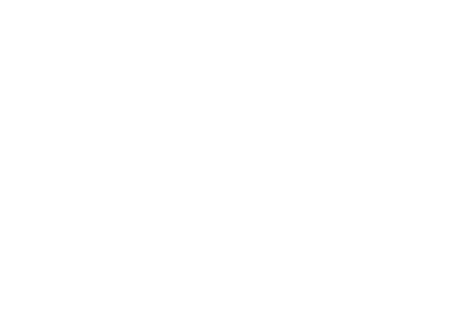

In [60]:
with tf.Session() as sess:
    sess.run(init)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.ion()
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    fig.show()
    fig.canvas.draw()
    
    for epoch in range(n_epochs):
        _, loss_val, W_, b_ = sess.run([optimizer, cost, W, b], feed_dict=feed)
        if(epoch+1) % display_step == 0:
            print("step {} cost {}".format(epoch, loss_val))
        params[:,epoch] = np.array([W_, b_, loss_val])
        ax.clear()
        plt.plot(train_X, train_Y, 'ro', label='Original data')
        ax.plot(train_X, W_ * train_X + b_)
        fig.canvas.draw()        
    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

# In[127]:


param_titles = ['Weight', 'Bias', 'Loss']

for i in range(params.shape[0]):
    plt.subplot(3, 1, i+1)
    plt.plot(params[i])
    plt.title(param_titles[i])
    plt.show()
